# Assignment 1

### Import

In [78]:
import os
import pandas as pd
import numpy as np
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from wordcloud import WordCloud

**If you want to run the code, please download stopWords and verbose**

In [79]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### WordCloud without natural language processing

In [80]:
filename = os.path.join('hillary-clinton-emails','Emails.csv') 
df = pd.read_csv(filename)
df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\r\nFriday, March 1...",B6\r\nUNCLASSIFIED\r\nU.S. Department of State...


We deceided first to use only the ExtractedBodyText even if the rawText could have gave us more information.

In [81]:
extractedBodyText = df['ExtractedBodyText']
extractedBodyText.head()

0                                                  NaN
1    B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...
2                                                  Thx
3                                                  NaN
4    H <hrod17@clintonemail.com>\r\nFriday, March 1...
Name: ExtractedBodyText, dtype: object

In [82]:
# Dealing with Nan values
extractedBodyText.fillna("", inplace = True)

In [83]:
# Creation of the string we will use for the worldcloud
theText = ""
for i in extractedBodyText.index:
    theText = theText + "".join(extractedBodyText[i])

** Generation of the first word cloud **

In [85]:
wordcloud = WordCloud().generate(theText)

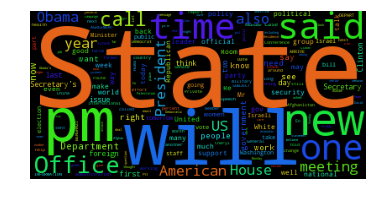

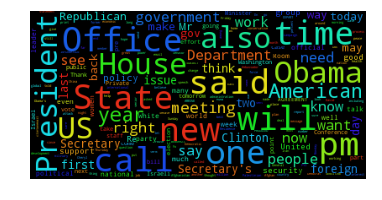

In [86]:
# Display the generated image:
# the matplotlib way:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(theText)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The result is quite good already even if we can spot unuseful word like new, one, pm...

### First Cleaning

In [87]:
del theText

In [88]:
import re

We remove everything between <>

In [89]:
extractedBodyText2 = extractedBodyText.apply(lambda x: re.sub('<.*>', ' ', x ))

The result is still really bad. We noticed that avery line after 030311.docx were not usefull and could be dropped.

In [90]:
extractedBodyText3 = extractedBodyText2.apply(lambda x: re.sub('030311 .* \\n', '', x))

We noticed that the same line was present at the end of every mail and this was misleading the result.

Also, we removed date, sender, receiver, mail information and a lot of word not containing meaning for what Hillary Clinton was writting.

After, we deceided word of lengh 1 or 2

In [91]:
extractedBodyText4 = extractedBodyText3.apply(lambda x: re.sub('^STATE DEPT .* STATE-[0-9A-Z]+', ' ', x))
extractedBodyText4 = extractedBodyText4.apply(lambda x: re.sub('Date: .* \\n',' ', x))
extractedBodyText4 = extractedBodyText4.apply(lambda x: re.sub('Doc No.: .* \\n',' ', x))
extractedBodyText4 = extractedBodyText4.apply(lambda x: re.sub('Case No.: .* \\n',' ', x))
extractedBodyText4 = extractedBodyText4.apply(lambda x: re.sub('Sent: .* \\n',' ', x))
extractedBodyText4 = extractedBodyText4.apply(lambda x: re.sub('To: .* \\n',' ', x))
extractedBodyText4 = extractedBodyText4.apply(lambda x: re.sub('^[A-Z] .* @ .* \\n',' ', x))
# extractedBodyText4 = extractedBodyText4.apply(lambda x: re.sub('[A-Z]{1}[a-z]+, [A-Z]{1}[a-z]+ \d+, [0-9]+ \d+:\d+ [A-Z]{2}', ' ', x))
extractedBodyText4 = extractedBodyText4.apply(lambda x: re.sub(' [a-zA-Z]{1} ', ' ', x))
extractedBodyText4 = extractedBodyText4.apply(lambda x: re.sub(' [a-zA-Z]{2} ', ' ', x))

In [92]:
del extractedBodyText, extractedBodyText2, extractedBodyText3

In [93]:
# Creation of the string we will use for the worldcloud
fourthAttempt = ""
for i in extractedBodyText4.index:
    fourthAttempt = fourthAttempt + "".join(extractedBodyText4[i])

In [94]:
fourthAttempt[:1000]

"B6\r\n \r\nH: Latest How Syria aiding Qaddafi and more... Sid\r\nhrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx\r\nMarch 3, 2011\r\nFor: HillaryThxH  \r\n \r\nHuma Abedin\r\nFw: H: Latest: How Syria aiding Qaddafi and more... Sid\r\nhrc memo syria aiding libya 030311.docx\r\nPis print.Pis print.\r\n-•-...-^\r\nH  \r\n \r\n°Russorv@state.gov'\r\nFw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots\r\nFrom [meat)\r\nSent:  \r\nTo: 11\r\nSubject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots\r\nhtte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked-\r\ndeadly-riots/\r\nSent from Verizon Wireless 4G LTE DROID\r\nU.S. Department State\r\nCase No. F-2015-04841\r\nDoc No. C05739559\r\nDate: 05/13/2015\r\nSTATE DEPT. - PRODUCED HOUSE SELECT BENGHAZI COMM.\r\nSUBJECT AGREEMENT SENSITIVE INFORMATION & REDACTIONS. FOIA WAIVER. STATE-5CB0045251H  \r\n \r\

We need to remove the new line symbole "\n" and "\r"

In [95]:
extractedBodyText5 = extractedBodyText4.apply(lambda x: re.sub('\n', ' ', x))
extractedBodyText5 = extractedBodyText5.apply(lambda x: re.sub('\r', ' ', x))
del extractedBodyText4, fourthAttempt

And transform all "-" with a space in order to process composed words

In [106]:
extractedBodyText5 = extractedBodyText5.apply(lambda x: re.sub('-', ' ', x))

In [107]:
# Creation of the string we will use for the worldcloud
fifthAttempt = ""
for i in extractedBodyText5.index:
    fifthAttempt = fifthAttempt + "".join(extractedBodyText5[i])

In [108]:
fifthAttempt[:1000]

"B6     H: Latest How Syria aiding Qaddafi and more... Sid  hrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx  March 3, 2011  For: HillaryThxH       Huma Abedin  Fw: H: Latest: How Syria aiding Qaddafi and more... Sid  hrc memo syria aiding libya 030311.docx  Pis print.Pis print.   • ... ^  H       °Russorv@state.gov'  Fw: Meet The Right Wing Extremist Behind Anti fvluslim Film That Sparked Deadly Riots  From [meat)  Sent:    To: 11  Subject: Meet The Right Wing Extremist Behind Anti Muslim Film That Sparked Deadly Riots  htte/maxbiumenthal.com12012/09/meet the right wing extremist behind anti musiim tihn that sparked   deadly riots/  Sent from Verizon Wireless 4G LTE DROID  U.S. Department State  Case No. F 2015 04841  Doc No. C05739559  Date: 05/13/2015  STATE DEPT.   PRODUCED HOUSE SELECT BENGHAZI COMM.  SUBJECT AGREEMENT SENSITIVE INFORMATION & REDACTIONS. FOIA WAIVER. STATE 5CB0045251H       Huma Abedin  Fw: H: Latest: How Syria aiding Qaddafi and mo

In [109]:
stopwords = nltk.corpus.stopwords.words('english')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
noStopWords = [word for word in nltk.word_tokenize(fifthAttempt) if word not in stopwords]
del fifthAttempt

In [110]:
del english_vocab

In [111]:
noStopWordsString = " ".join(noStopWords)

In [112]:
noStopWordsString[:100]

'B6 H : Latest How Syria aiding Qaddafi ... Sid hrc memo syria aiding libya 030311.docx ; hrc memo sy'

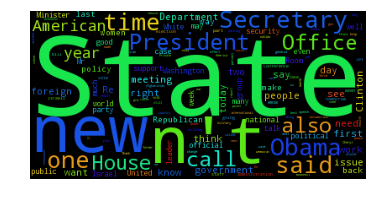

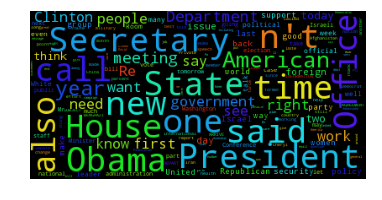

In [113]:
wordcloud5 = WordCloud().generate(noStopWordsString)
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud5)
plt.axis("off")

# lower max_font_size
wordcloud5 = WordCloud(max_font_size=40).generate(noStopWordsString)
plt.figure()
plt.imshow(wordcloud5)
plt.axis("off")
plt.show()

### Natural language processing

Here, we will use a big set of english verb to remove them from our text since we thourgt that verbs will not bring any information on Hillary Clinton's thought.

In [114]:
from nltk.corpus import verbnet
len(noStopWords)

448282

** Caution: This part of the code can takes lot of time **

In [115]:
noVerbs = []
for i in range(len(noStopWords)):
    if i % 10000 == 0:
        print(i)
    if noStopWords[i] not in verbnet.lemmas():
        noVerbs.append(noStopWords[i])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000


In [116]:
# Creation of the string we will use for the worldcloud
noVerbsString = " ".join(noVerbs)

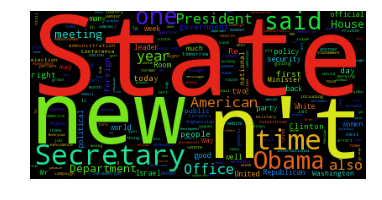

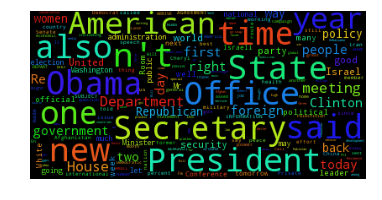

In [117]:
wordcloud6 = WordCloud().generate(noVerbsString)
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud6)
plt.axis("off")

# lower max_font_size
wordcloud6 = WordCloud(max_font_size=40).generate(noVerbsString)
plt.figure()
plt.imshow(wordcloud6)
plt.axis("off")
plt.show()

We can now eliminate words like 'said', 'two', 'first' etc that we subjectively judge not useful

In [118]:
notWanted = ["said", "two", "first", "well", "one", "new", "n't", "also", "pm", "re"]

In [119]:
perso = [word for word in noVerbs if word not in notWanted]

In [120]:
# Creation of the string we will use for the worldcloud
persoString = " ".join(perso)

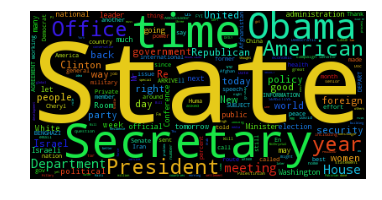

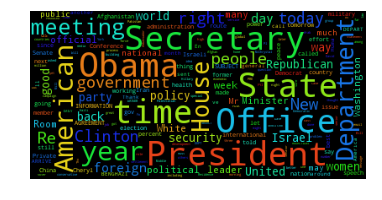

In [121]:
wordcloud7 = WordCloud().generate(persoString)
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud7)
plt.axis("off")

# lower max_font_size
wordcloud7 = WordCloud(max_font_size=40).generate(persoString)
plt.figure()
plt.imshow(wordcloud7)
plt.axis("off")
plt.show()

### Conclusion

The main difference between the world cloud with and without natural language processing is the deletion of word without meaning for analysing Hillary Clinton's mails. 